<a id=top></a>

# Information Cascade Measurements

<centering> 
<img src=./img/information_cascades.png width=80%>
</centering>
<br>


## Overview
 
### <a href='#imports'> 1) Imports </a>

### <a href='#load_data'> 2) Information Cascades Dataset </a>
  
### <a href='#instantiate'> 3) Measurement Object Instantiation </a>

### <a href='#rundown'> 4) Rundown of Information Cascade Measurements </a>


### <a href='#questions'> 5) Bonus Exercise </a>


<a id=imports></a>

## Imports
[Jump to top](#top)

In [39]:
import socialsim as ss

If you were unable to install SNAP, run the cell below and then re-run the cell above to ignore the warnings about backend code switching to SNAP workarounds using python-igraph only:

In [40]:
import warnings
warnings.filterwarnings("ignore")

<a id=load_data></a>

## Information Cascades Dataset
[Jump to top](#top)

In [41]:
dataset_path = '../data/tutorial_cascades.json' 
dataset = ss.load_data(dataset_path, verbose=False)

In [42]:
dataset.head()

,actionType,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID
0,retweet,CVE-2015-1805,oiO30BYNA6BmoW89_ptvlA,2016-04-02 07:16:14,b5zIUfghJM_BHTm7gs-1sw,TQh3OlPQhcobW9M4sJkSzQ,twitter,TQh3OlPQhcobW9M4sJkSzQ
1,retweet,CVE-2015-1805,ztffH_tVc24Do99WalTHdQ,2016-04-02 08:20:06,Yy6XZzIzIJt9hFh-crsVIQ,TQh3OlPQhcobW9M4sJkSzQ,twitter,TQh3OlPQhcobW9M4sJkSzQ
2,retweet,CVE-2015-1805,X7jmQOmMoBUVZDRgf4Y2FQ,2016-04-02 09:14:03,rbHhDmttniky1q5LCoIC9A,TQh3OlPQhcobW9M4sJkSzQ,twitter,TQh3OlPQhcobW9M4sJkSzQ
3,retweet,CVE-2015-1805,fXI3cnNkDiZ96sMo1Kwh9A,2016-04-02 09:35:52,omnGf3rEUjs_8jmSraz75Q,TQh3OlPQhcobW9M4sJkSzQ,twitter,TQh3OlPQhcobW9M4sJkSzQ
4,retweet,CVE-2015-1805,c-mH-uM9UoYp5rGYHi9AUw,2016-04-02 10:13:23,qFvphv_6HfrvCD8y1Bh8rw,TQh3OlPQhcobW9M4sJkSzQ,twitter,TQh3OlPQhcobW9M4sJkSzQ


#### In this dataset, there are information cascades on:

In [43]:
platforms = set(dataset['platform'])
n_platforms = len(platforms)
print('{} {} :\n{}'.format(n_platforms,('platforms' if n_platforms > 1 else 'platform'),
                           ', '.join(['"{}"'.format(platform) for platform in platforms])))

1 platform :
"twitter"


In [44]:
print(len(set(dataset['informationID'])), 'pieces of information:')
print(set(dataset['informationID']))

6 pieces of information:
{'CVE-2017-0037', 'CVE-2015-1805', 'CVE-2017-0199', 'CVE-2017-0059', 'CVE-2015-3864', 'CVE-2017-8295'}


 ### This notebook focuses on information cascades about Common Vulnerabilities and Exposures:
 1. 'CVE-2017-8295'
 
 <img src=img/cve_2017_8295.png width = 80%></img>
 
 2. 'CVE-2015-3864'
 
 <img src=img/cve_2015_3864.png width = 80%></img>
 
 3. 'CVE-2017-0037'
 
 <img src=img/cve_2017_0037.png width = 80%></img>
 
 4. 'CVE-2015-1805'
 
 <img src=img/cve_2015_1805_cascades.png width = 80%></img>
 
 5. 'CVE-2017-0199'
 
 <img src=img/cve_2017_0199.png width = 80%></img>
 
 6. 'CVE-2017-0059'
 
 <img src=img/cve_2017_0059.png width = 80%></img>

<br>

### Note: In practice, before you can run any cascade measurements on your piece(s) of information being spread, you will need to reconstruct the cascade. Some platforms provide these links directly in the metadata of content return from API calls and some require you to reconstruct the links as we described before when we covered **Data Extraction**. For this notebook, we have provided the sample data with the cascade reconstruction already completed.

<a id=instantiate></a>

## Measurement Object Instantiation
[Jump to top](#top)

Next, we need to instantiate our measurement object using the data we are interested in measuring (**subset**), the **config** we have loaded, and the **platform** we are focused on. We pass in an empty **ss.MetaData()** object because we are not specifying any metadata like specific communities etc.

In [45]:
cascades = ss.InformationCascadeMeasurements(dataset)

Once again, you can get a quick list of all the measurements available to you to use by calling **list_measurements()** :

In [46]:
cascades.list_measurements()

1) cascade_breadth_by_depth: the number of nodes created at a given depth

2) cascade_breadth_by_time: the number of nodes created at a given time/within a given time bin

3) cascade_collection_initialization_gini: gini coefficient summarizing to what extent are posts that trigger information cascades disproportionately
        authored by a subset of the users?

4) cascade_collection_initialization_palma: palma ratio summarizing to what extent are posts that trigger information cascades disproportionately
        authored by a subset of the users who participate in the cascade?

5) cascade_collection_participation_gini: gini coefficient summarizing to what extent are posts sets of cascades disproportionately
        authored by a subset of the users who participate in the cascade?

6) cascade_collection_participation_palma: palma ratio summarizing to what extent are posts within a collection of information cascades disproportionately
        authored by a subset of the users who parti

<a id=rundown></a>

### Part 5: Rundown of Cascade Measurements
[Jump to top](#top)


### Cascade Measurements by Time

- cascade_max_depth_over_time 
- cascade_breadth_by_time
- cascade_structural_virality_over_time
- cascade_size_over_time
- cascade_uniq_users_by_time
- cascade_new_user_ratio_by_time 
    
<centering> 
<img src=./img/cascade_time_measurements.png></src>
</centering> 



As we have seen before, you can **plot the results** using the **generate_plot** function for any of the measurements.

As a reminder: 

The **generate_plot** function takes the pandas dataframe with the results of the measurement (which we pass as **measurement_output**), the name of the measurement (given with **measurement_name=single_measurement**), and a boolean flag for whether to show the plot once generated (**show=True**).

### cascade_max_depth_over_time

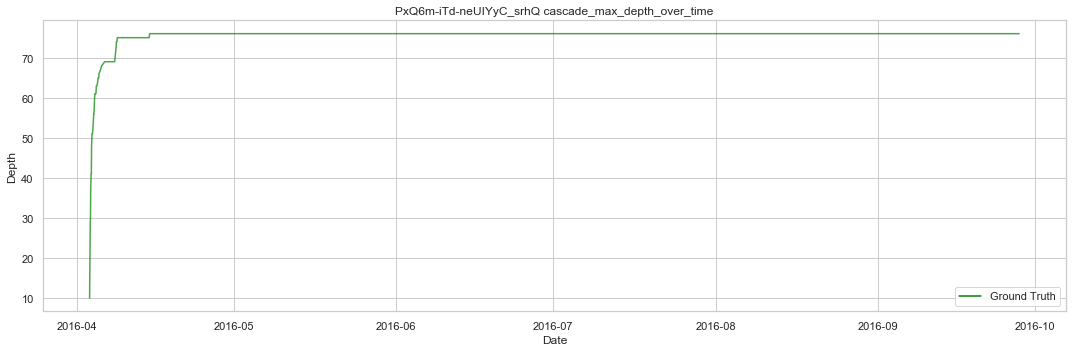

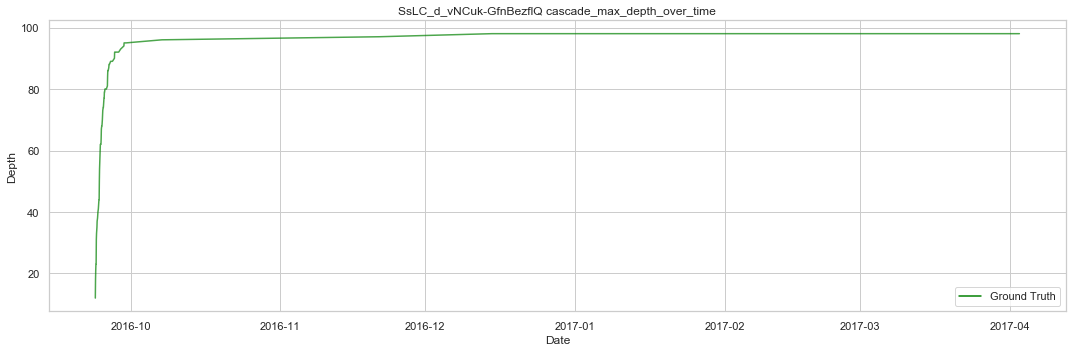

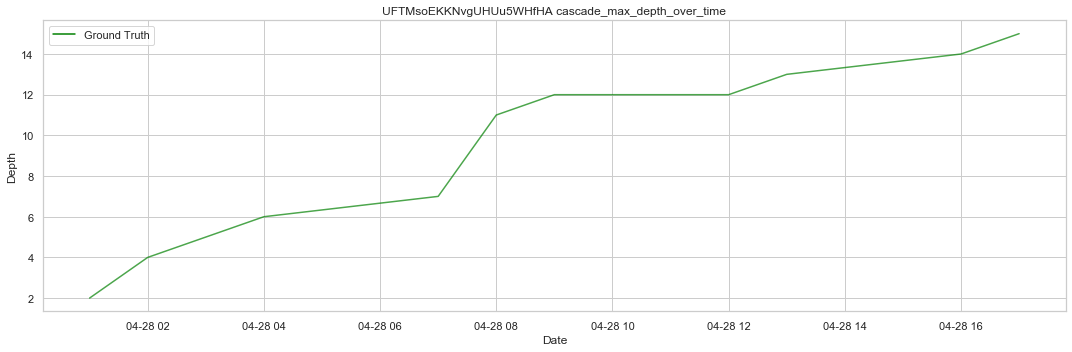

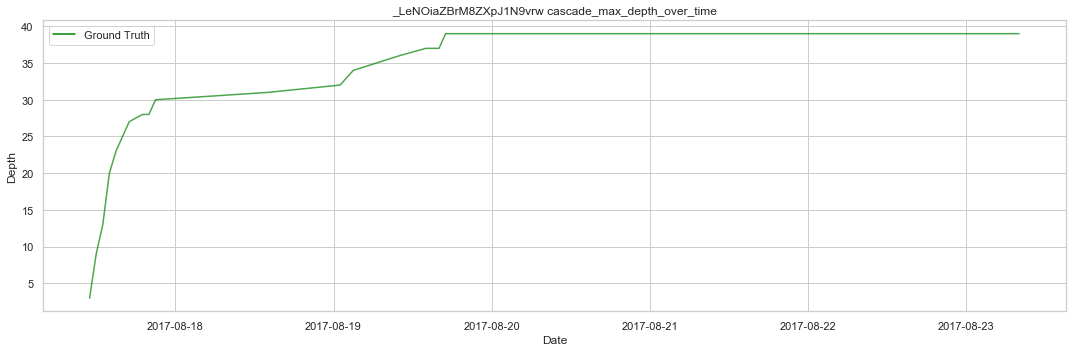

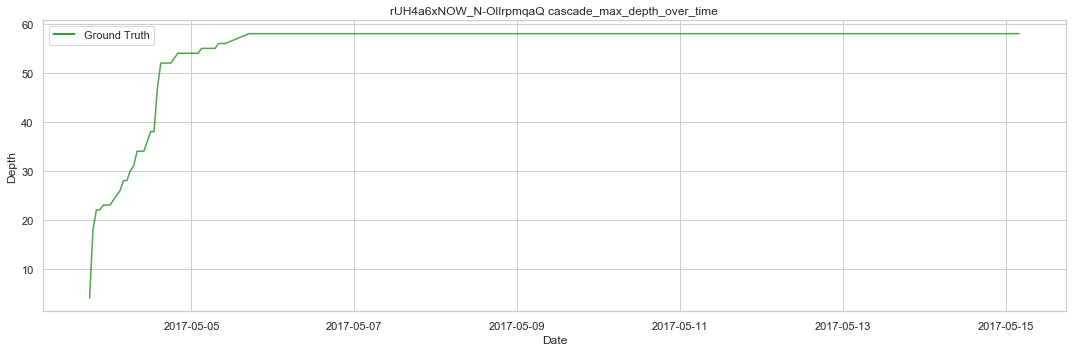

In [47]:
res = cascades.cascade_max_depth_over_time()
ss.generate_plot(res, measurement_name='cascade_max_depth_over_time', show=True)

### cascade_breadth_by_time

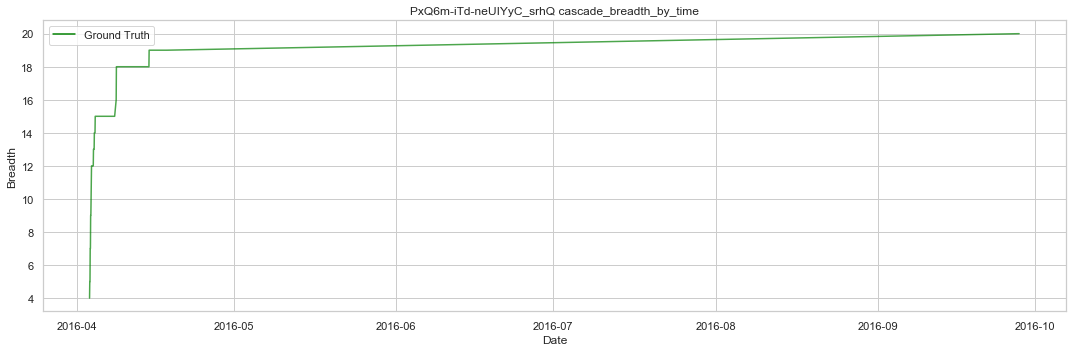

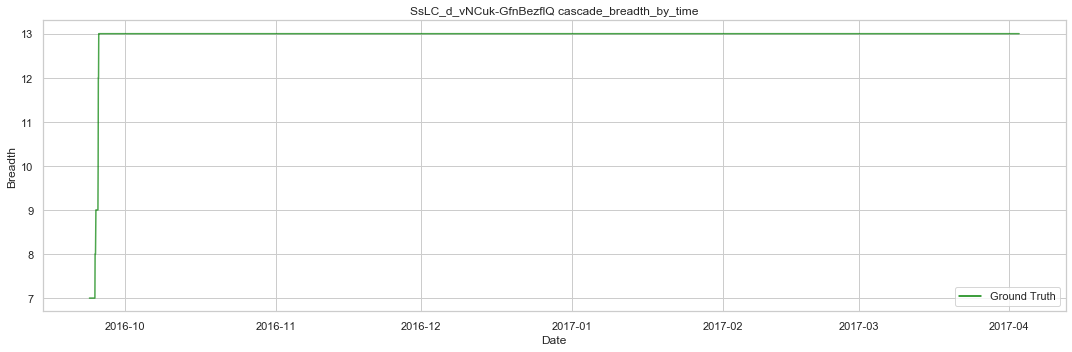

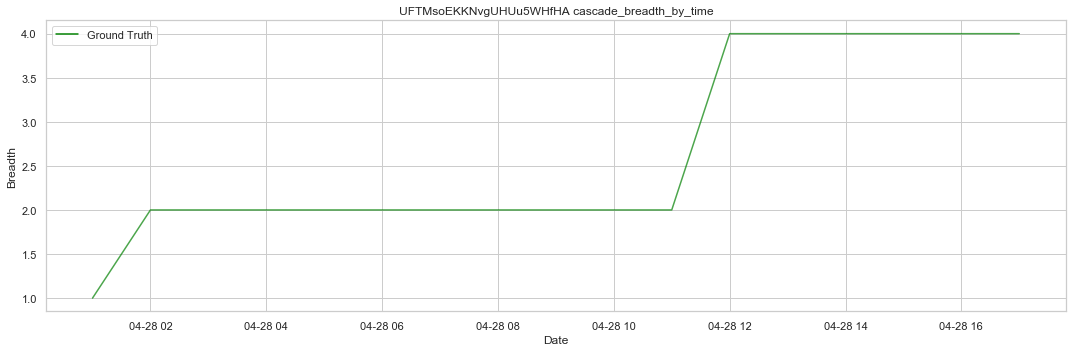

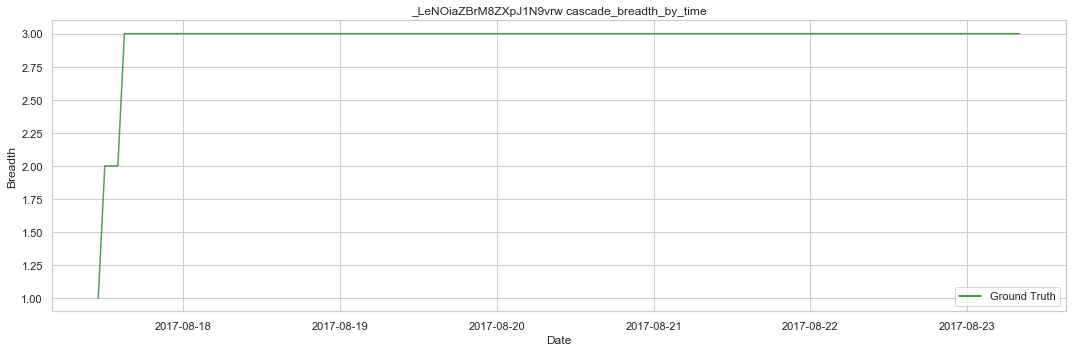

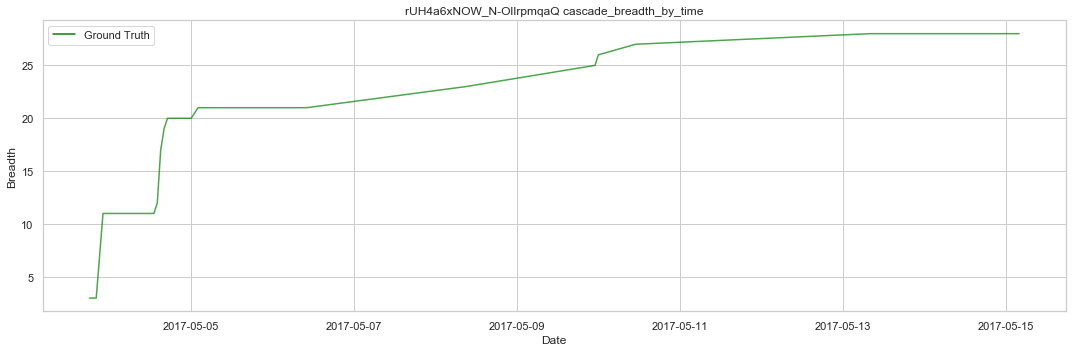

In [48]:
res = cascades.cascade_breadth_by_time()
ss.generate_plot(res, measurement_name='cascade_breadth_by_time', show=True)

### cascade_structural_virality_over_time

This measures how "viral'' the cascade is by looking at how closely nodes are connected within the discussion (average path lengths between nodes in the cascade). 
This is also know as the Weiner Index (WI) of the cascade.

$structural~virality= \frac{1}{n(n-1)}\sum_{i=1}^{n}\sum_{j=1}^{n}d_{ij}$ where $d_{ij}$ is the length of the shortest path between nodes $i$ and nodes $j$ in the cascade tree.




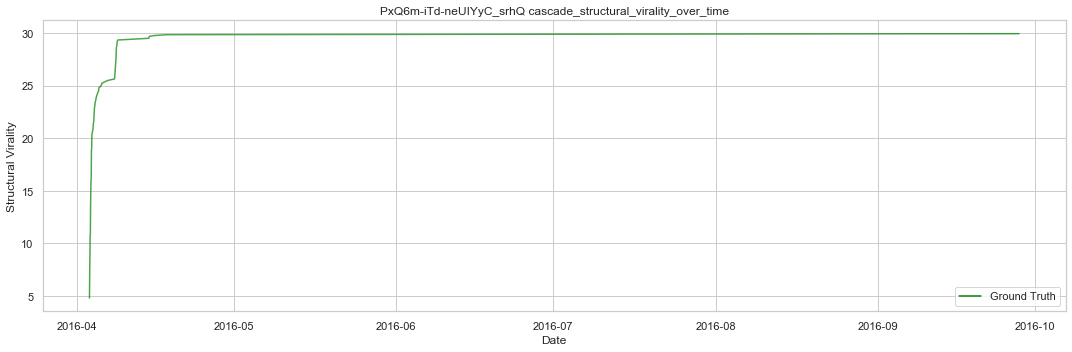

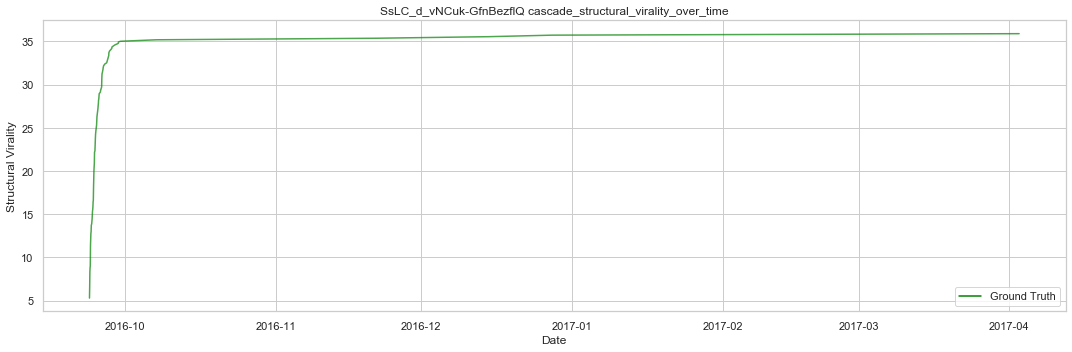

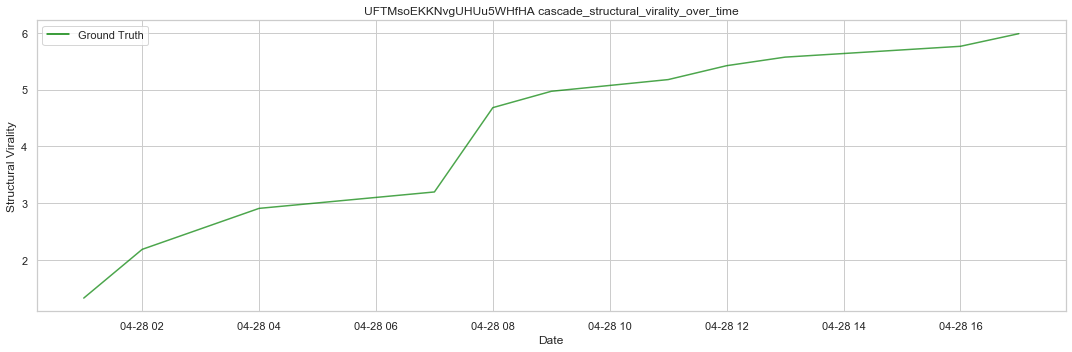

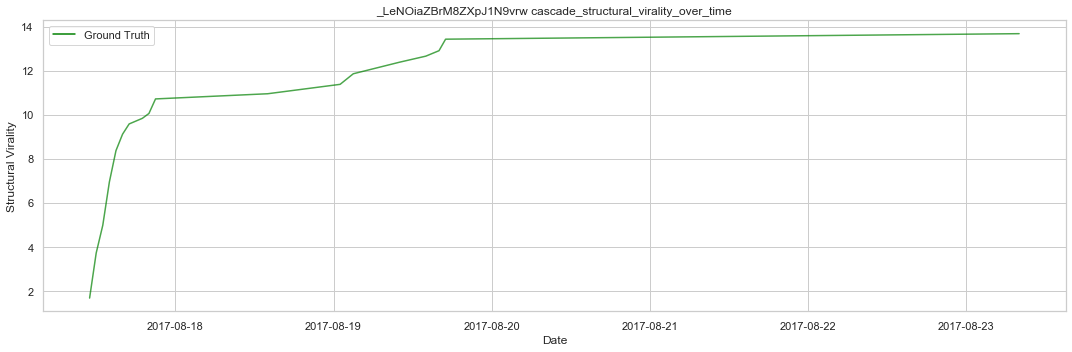

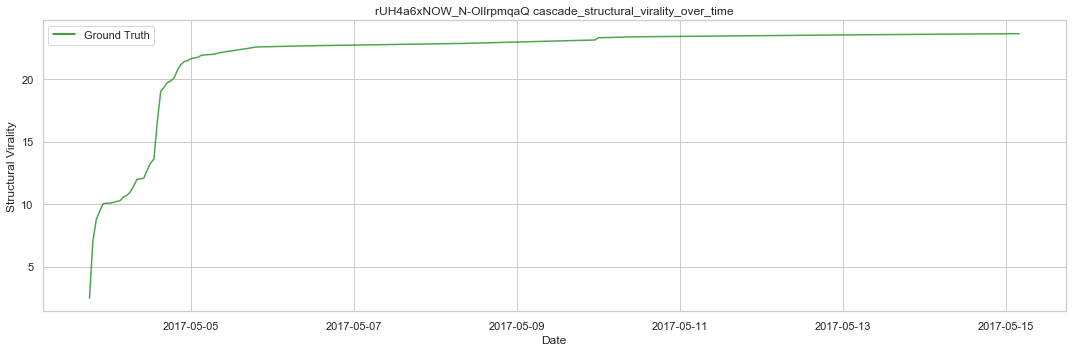

In [49]:
res = cascades.cascade_structural_virality_over_time()
ss.generate_plot(res, measurement_name='cascade_structural_virality_over_time', show=True)

### cascade_size_over_time

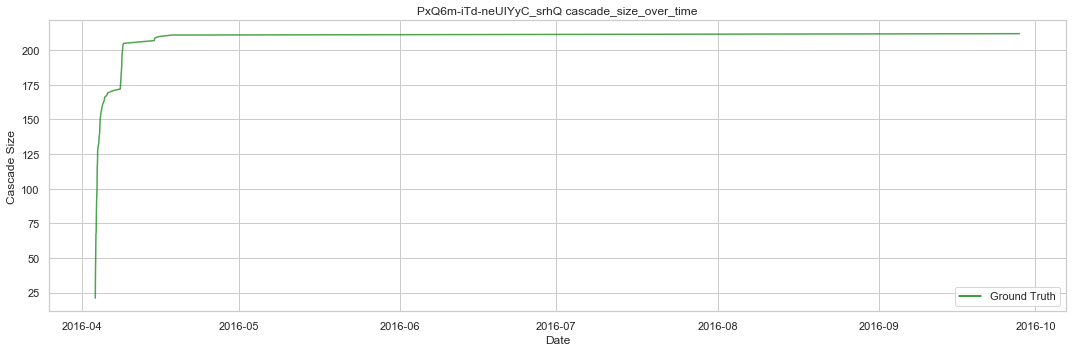

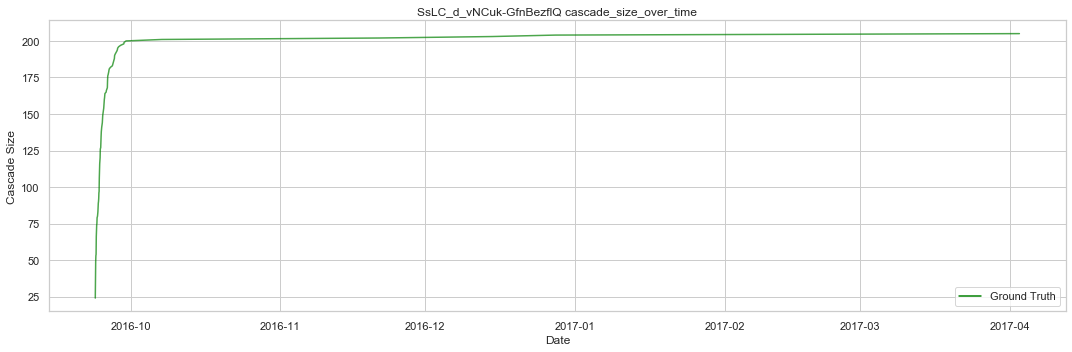

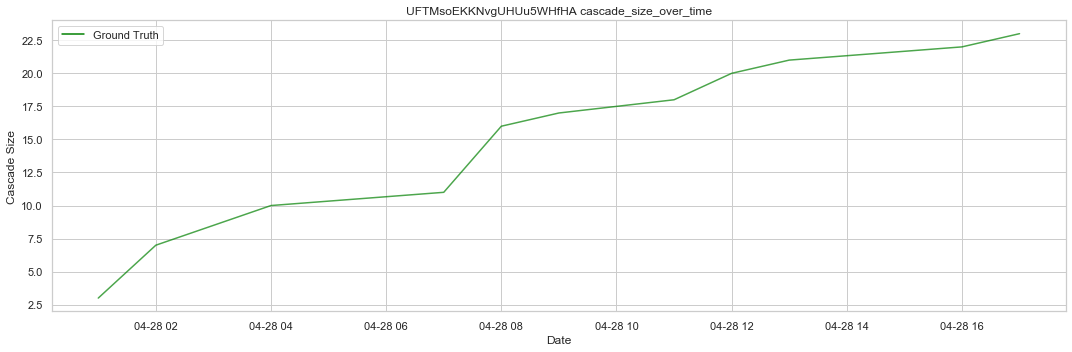

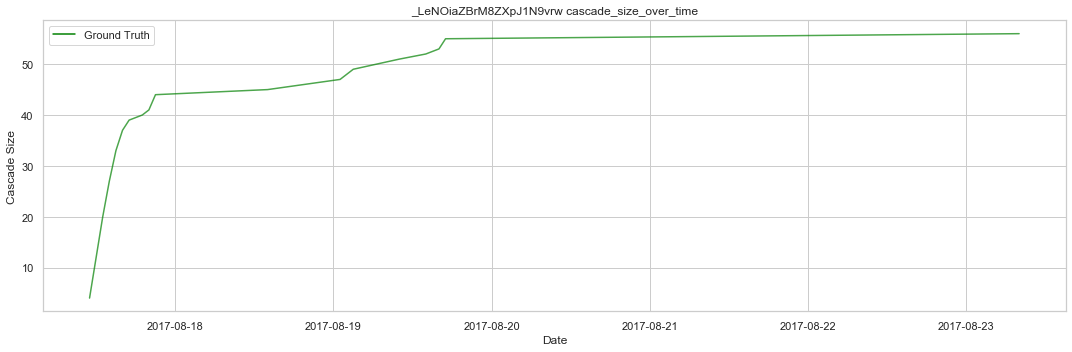

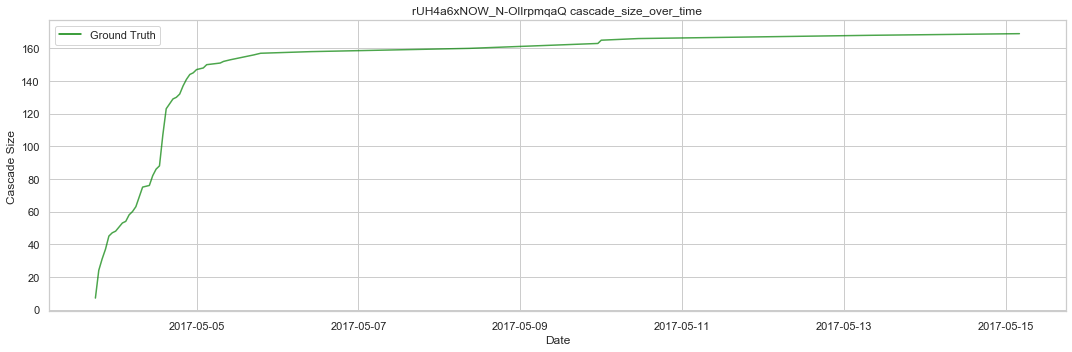

In [50]:
res = cascades.cascade_size_over_time()
ss.generate_plot(res, measurement_name='cascade_size_over_time', show=True)

### cascade_uniq_users_by_time

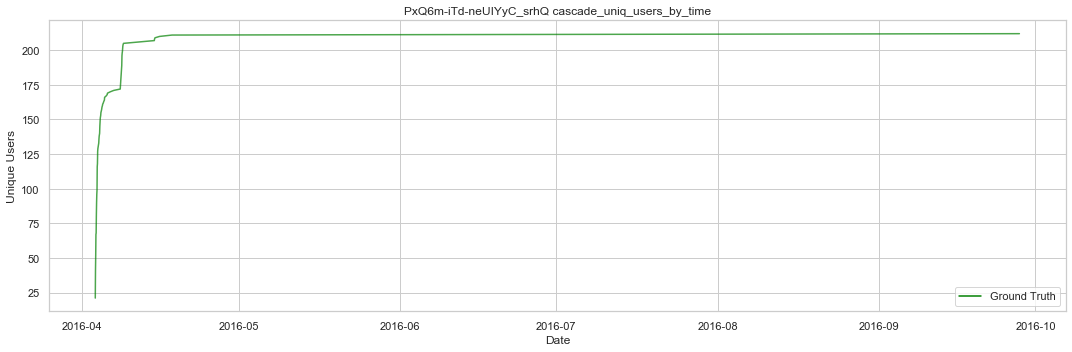

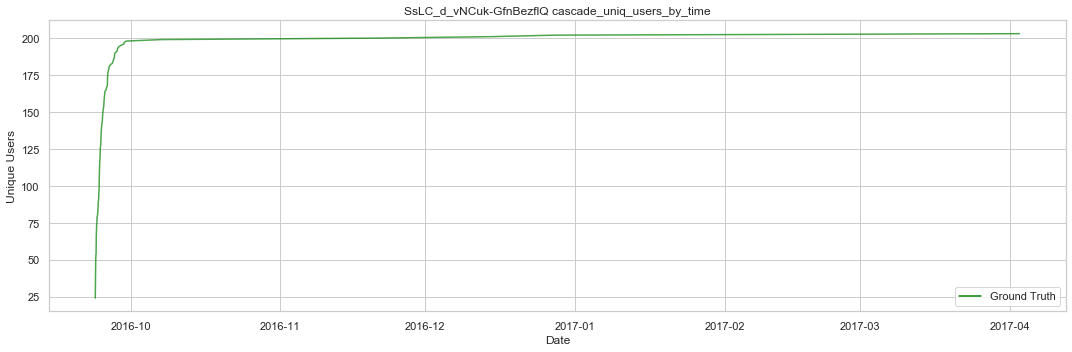

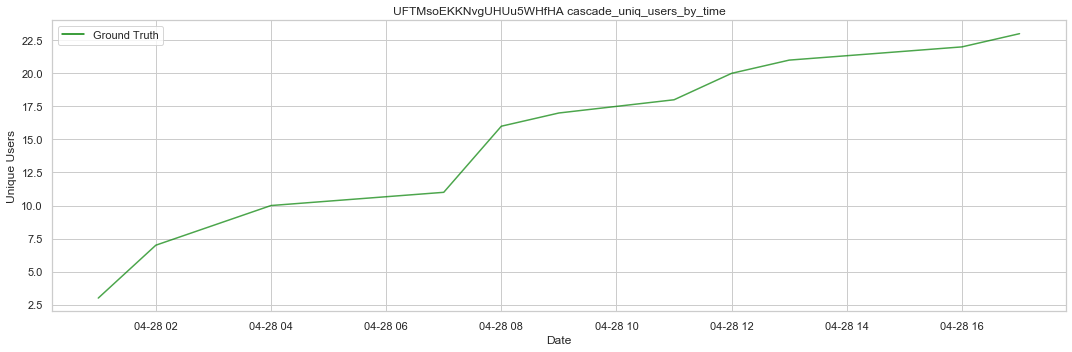

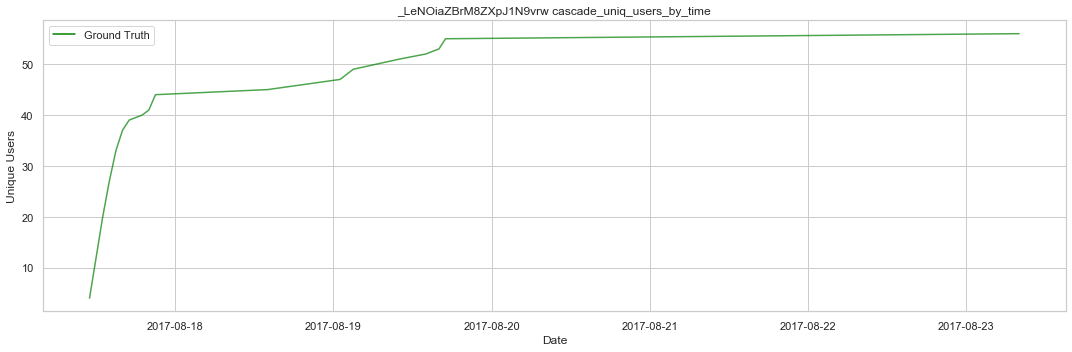

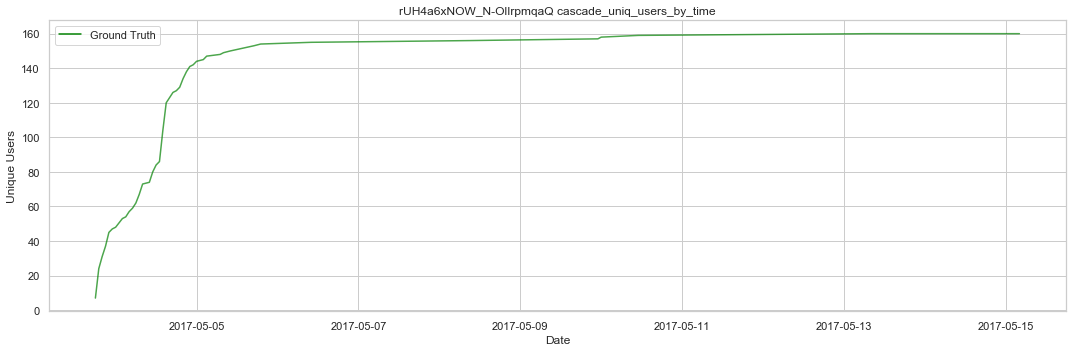

In [51]:
res = cascades.cascade_uniq_users_by_time()
ss.generate_plot(res, measurement_name='cascade_uniq_users_by_time', show=True)

### cascade_new_user_ratio_by_time

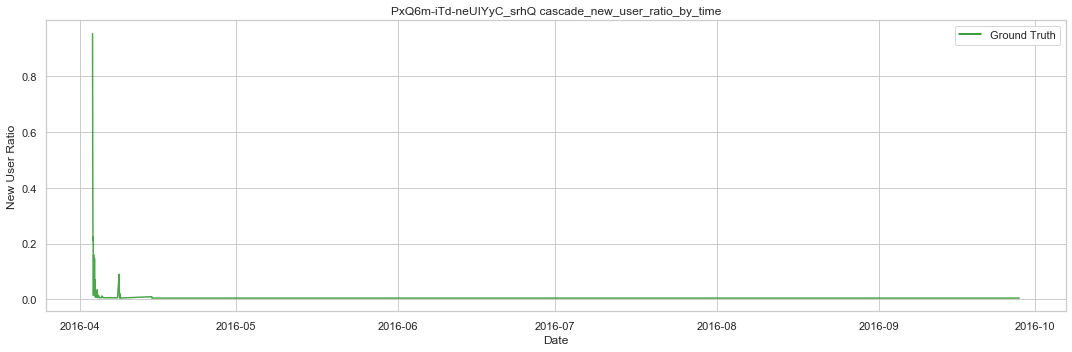

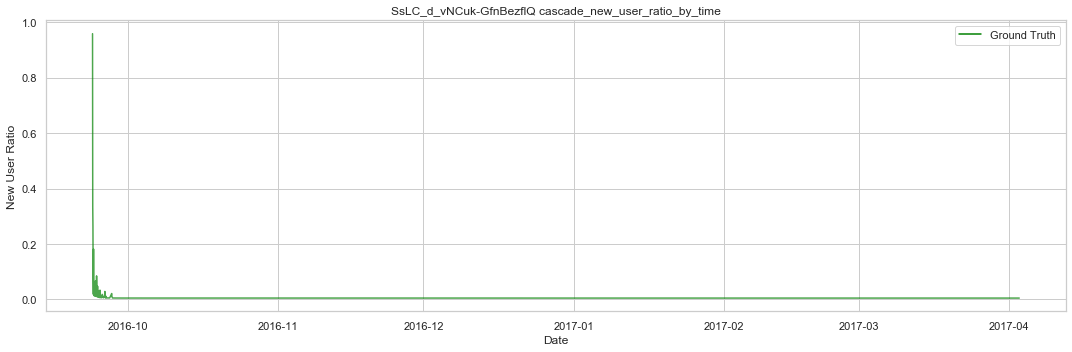

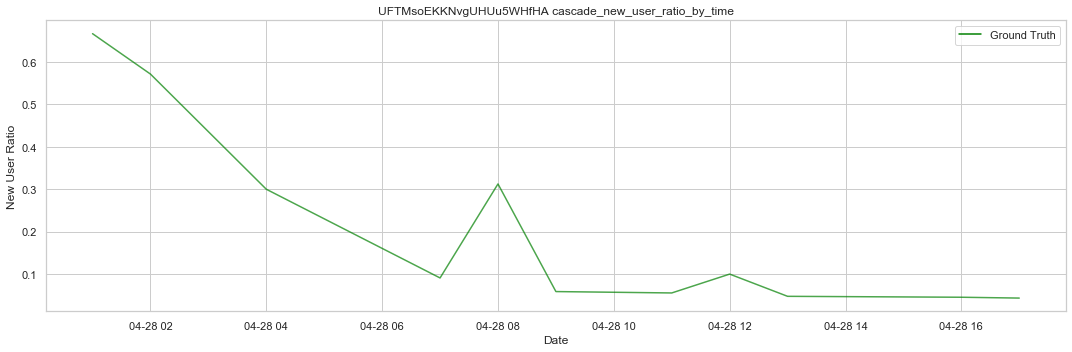

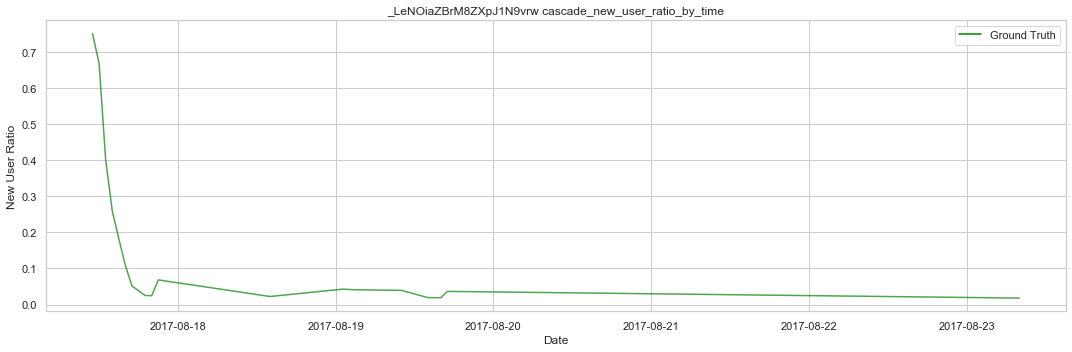

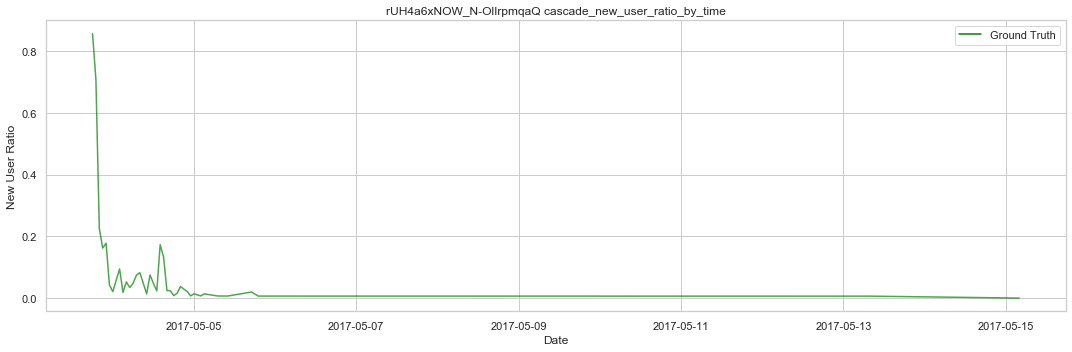

In [52]:
res = cascades.cascade_new_user_ratio_by_time()
ss.generate_plot(res, measurement_name='cascade_new_user_ratio_by_time', show=True)


### Cascade Measurements by Depth

- cascade_breadth_by_depth 
- cascade_new_user_ratio_by_depth 
- cascade_uniq_users_by_depth 
    
<centering> 
<img src=./img/cascade_depth_measurements.png></src>
</centering> 



### cascade_breadth_by_depth

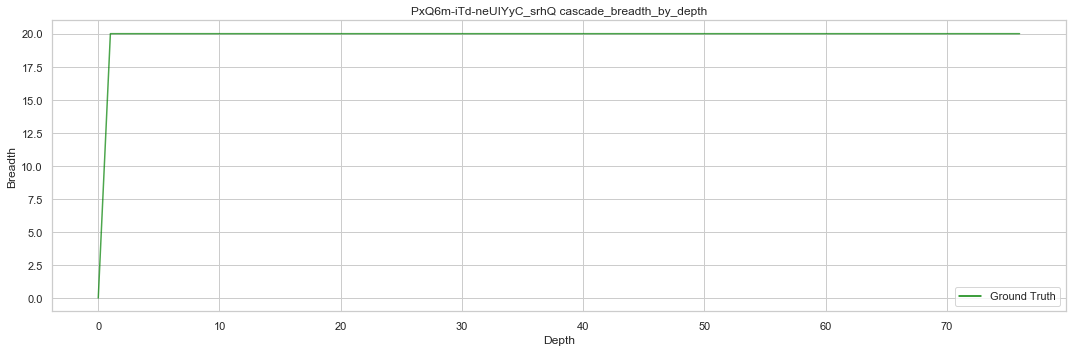

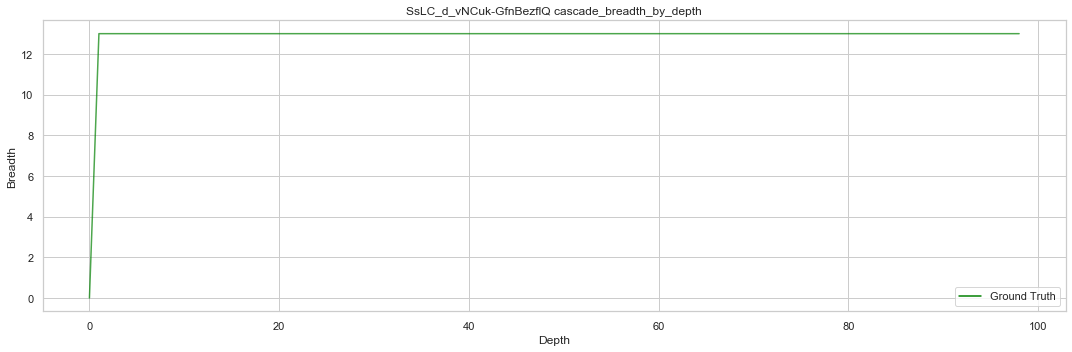

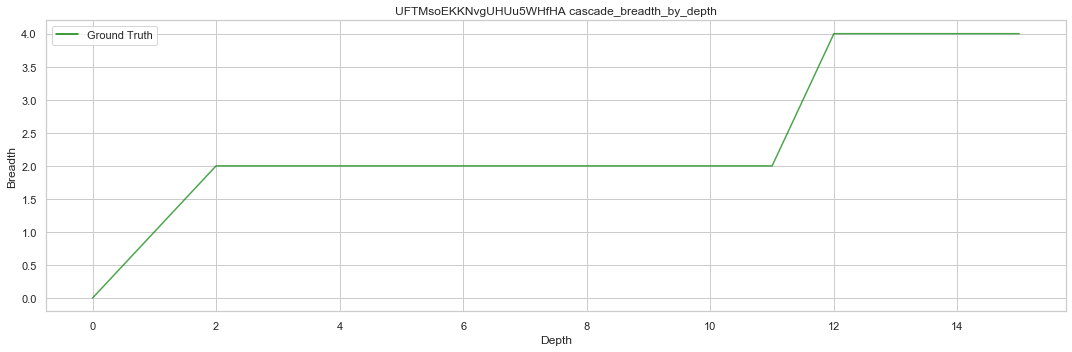

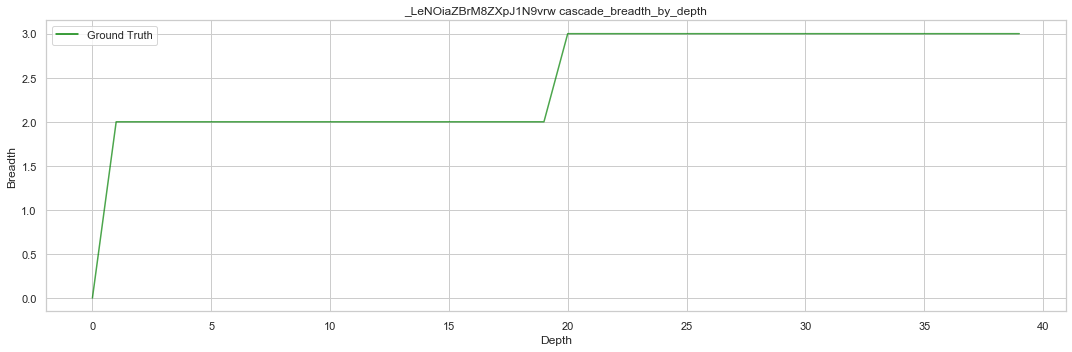

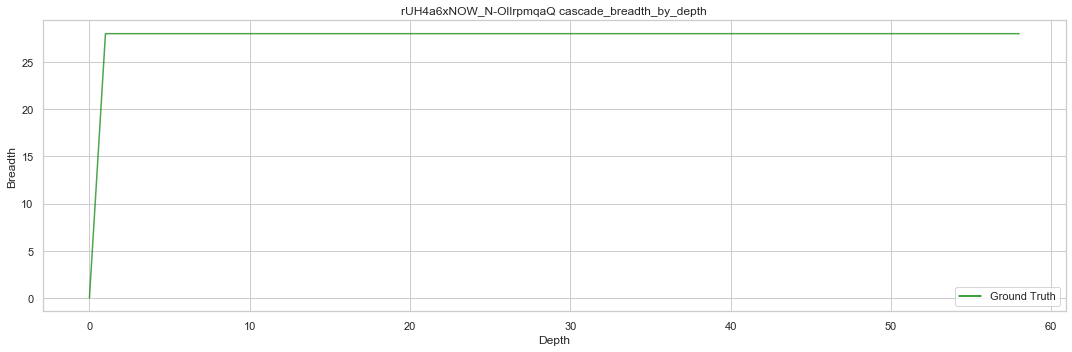

In [53]:
res = cascades.cascade_breadth_by_depth()
ss.generate_plot(res, measurement_name='cascade_breadth_by_depth', show=True)

### cascade_new_user_ratio_by_depth

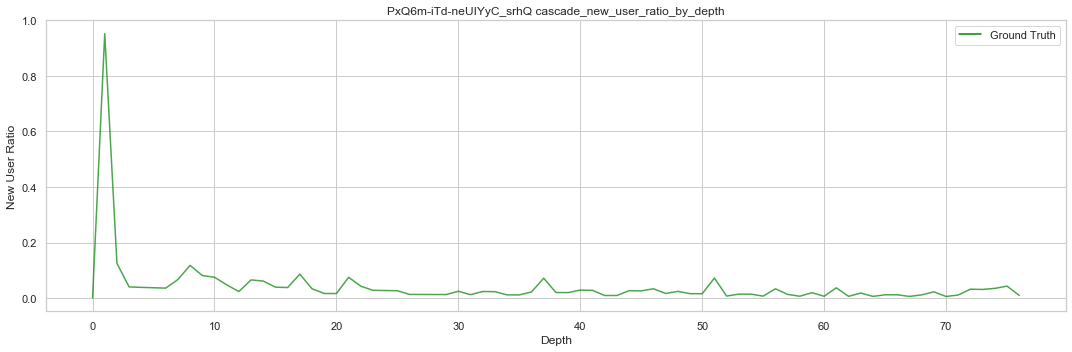

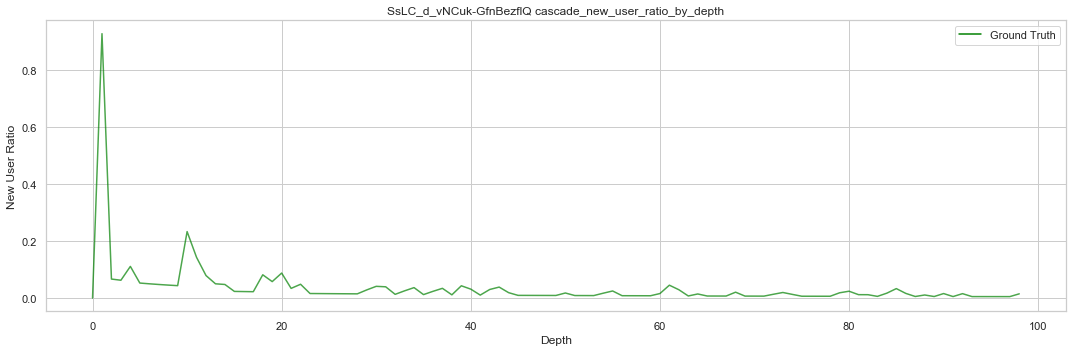

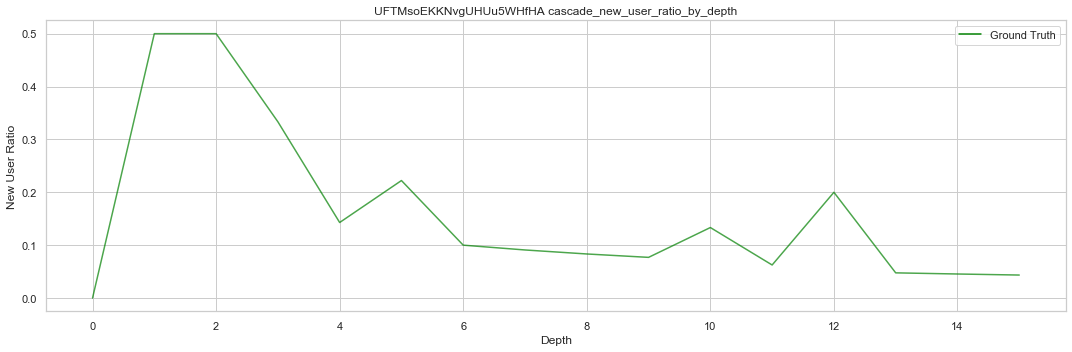

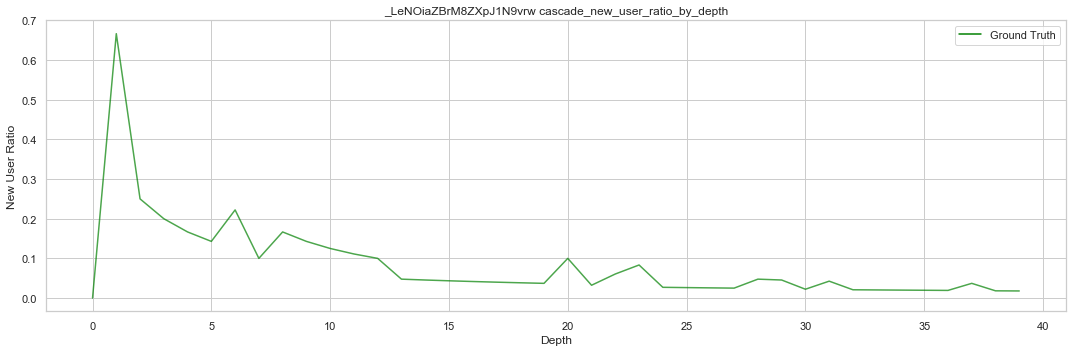

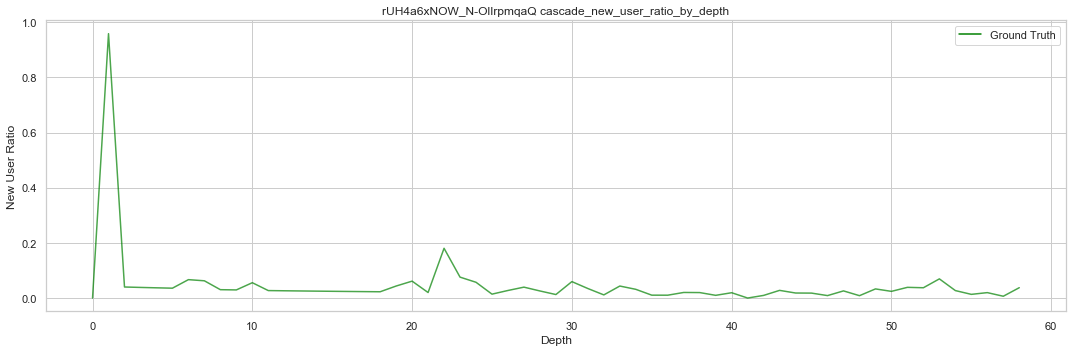

In [54]:
res = cascades.cascade_new_user_ratio_by_depth()
ss.generate_plot(res, measurement_name='cascade_new_user_ratio_by_depth', show=True)

### cascade_uniq_users_by_depth

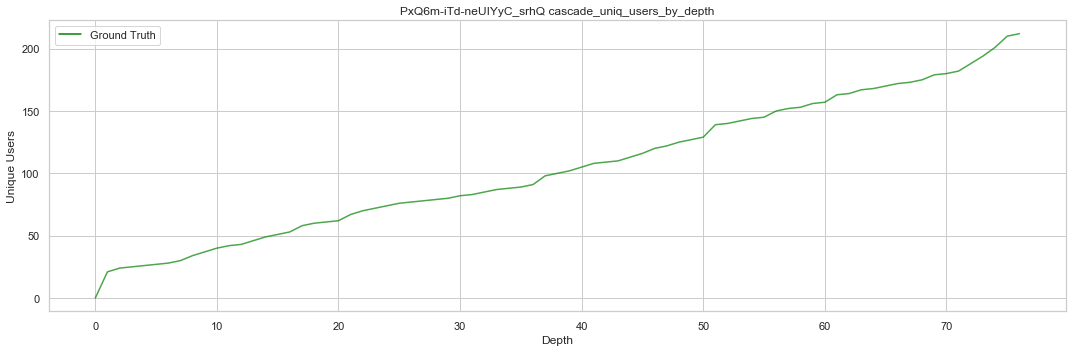

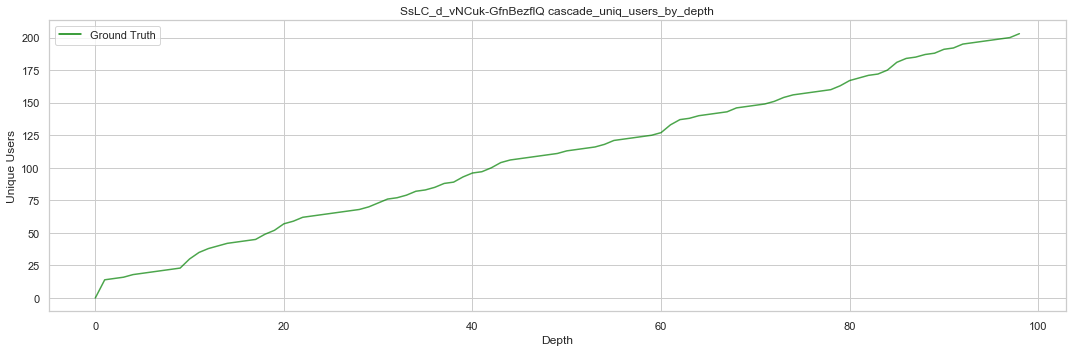

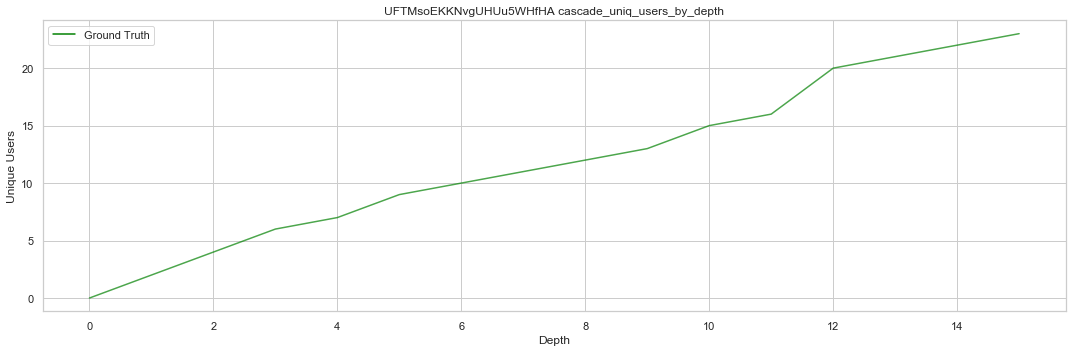

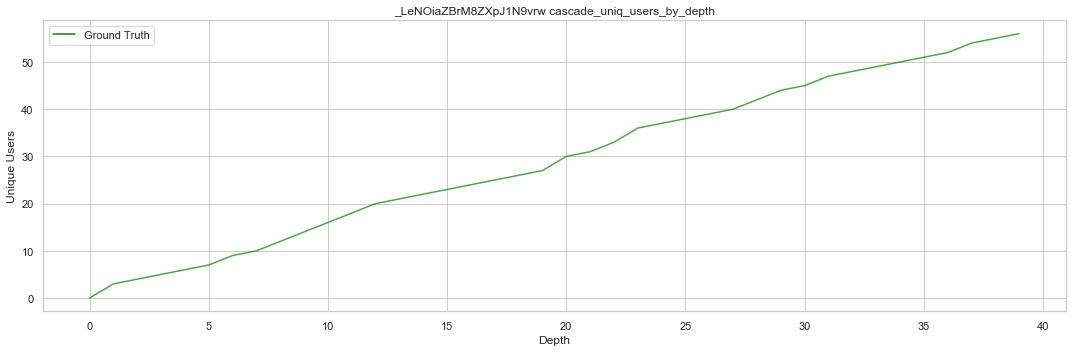

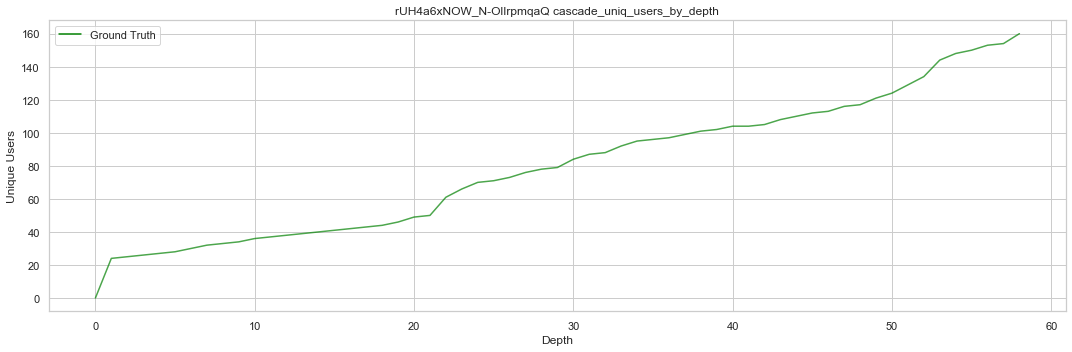

In [55]:
res = cascades.cascade_uniq_users_by_depth()
ss.generate_plot(res, measurement_name='cascade_uniq_users_by_depth', show=True)


### Cascade Participation Inequality Measurements 

- cascade_participation_gini 
- cascade_participation_palma 
- cascade_collection_initialization_gini
- cascade_collection_initialization_palma
- cascade_collection_participation_gini
- cascade_collection_participation_palma



As a graphical representation of income inequality within a population, Lorenz curves plot the share of income by the cumulative share of the population. Lorenz curves that measure the inequality in propagation plot the share of total propagation, i.e., the $y$\% of tweets posted, by the share of the population who authored tweets, i.e., the cumulative $x$\% of active users. 

<centering> 
<img src=./img/lorenz_curves.png width = 50%></src>
</centering> 

The Gini coefficient is the proportion of the area under the line of perfect equality ($a_1+a_2$) that is captured between the line of perfect equality and the Lorenz curve ($a_1$). 


The Palma ratio is defined as the ratio of the share of the top 10\% to the bottom 40\% of users in the population. Again, using income as an example, in perfect equality each individual in the population is responsible for an equal amount, \eg an equal share of income, resulting in a Palma ratio of $1/4$.  The Palma ratio was formulated as another measure of inequality because the Gini coefficient is most sensitive to changes in the middle, which is relatively stable &mdash; the Palma ratio, on the other hand, is sensitive to changes at the extremes. 
    

### cascade_participation_gini

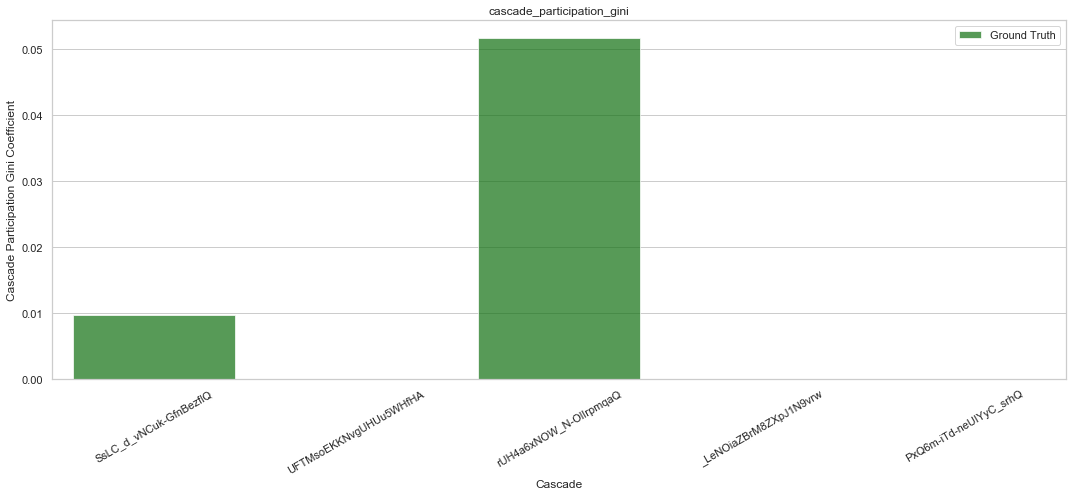

In [56]:
res = cascades.cascade_participation_gini()
ss.generate_plot(res, measurement_name='cascade_participation_gini', show=True)

### cascade_participation_palma

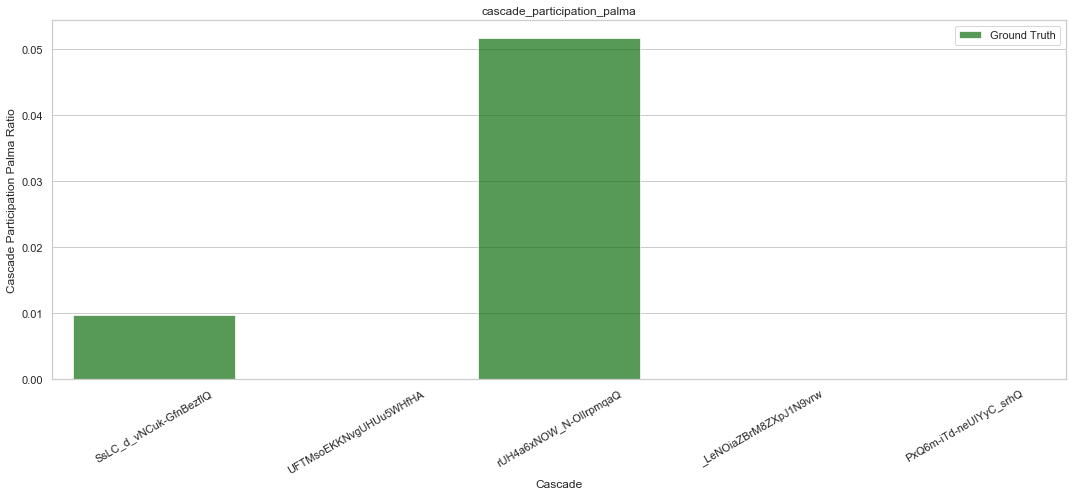

In [57]:
res = cascades.cascade_participation_gini()
ss.generate_plot(res, measurement_name='cascade_participation_palma', show=True)

### cascade_collection_initialization_gini

In [58]:
res = cascades.cascade_collection_initialization_gini()
print(res) 

0.0


### cascade_collection_initialization_palma

In [59]:
res = cascades.cascade_collection_initialization_palma()
print(res) 

0.5


### cascade_collection_participation_gini

In [60]:
res = cascades.cascade_collection_participation_gini()
print(res) 

0.06598033545401967


### cascade_collection_participation_palma

In [61]:
res = cascades.cascade_collection_participation_palma()
print(res) 

0.4398496240601504


<a id="questions"></a>

### Bonus Exercise 
[Jump to top](#top)

Which cascade has the highest _Gini Coefficient_?

Does that cascade have the highest _Palma Ratio_ ?